Mean Squared Error on drifted data: 23.848531778202414


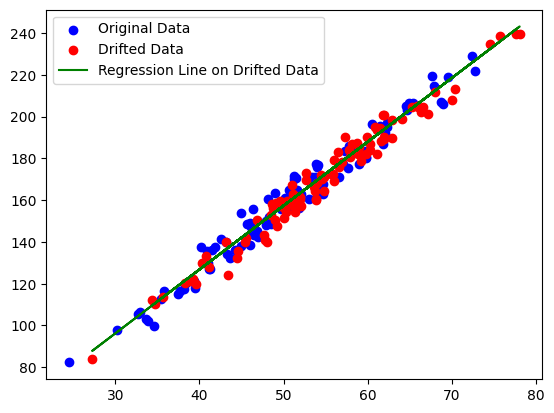

In [5]:
import numpy as np  # Import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Generate original training data
np.random.seed(0)  # Set seed for reproducibility
X_train = np.random.normal(loc=50, scale=10, size=100).reshape(-1, 1)
y_train = 3 * X_train.flatten() + 7 + np.random.normal(0, 5, size=100)  # y = 3x + 7 + noise

# Step 2: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Generate drifted data (e.g., shift the mean)
X_drifted = np.random.normal(loc=55, scale=10, size=100).reshape(-1, 1)
y_drifted = 3 * X_drifted.flatten() + 7 + np.random.normal(0, 5, size=100)

# Step 4: Evaluate on the drifted data
y_pred_drifted = model.predict(X_drifted)
mse_drifted = mean_squared_error(y_drifted, y_pred_drifted)
print(f"Mean Squared Error on drifted data: {mse_drifted}")

# Step 5: Visualize the original and drifted data
plt.scatter(X_train, y_train, color='blue', label='Original Data')
plt.scatter(X_drifted, y_drifted, color='red', label='Drifted Data')
plt.plot(X_drifted, y_pred_drifted, color='green', label='Regression Line on Drifted Data')
plt.legend()
plt.show()


In [6]:
# Monitoring Data Distribution Changes
# Question: Use Python to monitor distribution changes in features to detect potential data drift.

# 1. Calculate feature statistics (mean and standard deviation) for both original and drifted data:
# 2. Compare statistics:
# 3. Set thresholds to detect significant drift:
import numpy as np
import pandas as pd

# Step 1: Simulate original and drifted data
np.random.seed(0)

original_data = np.random.normal(loc=50, scale=5, size=1000)  # Original feature distribution
drifted_data = np.random.normal(loc=60, scale=10, size=1000)  # Drifted feature distribution

# Step 2: Calculate statistics
def summarize(data, label):
    return pd.Series({
        f'{label}_mean': np.mean(data),
        f'{label}_std': np.std(data)
    })

original_stats = summarize(original_data, "original")
drifted_stats = summarize(drifted_data, "drifted")

# Step 3: Combine and compare statistics
comparison = pd.concat([original_stats, drifted_stats], axis=0)

# Step 4: Check if drift exceeds defined thresholds
mean_diff = abs(comparison['original_mean'] - comparison['drifted_mean'])
std_diff = abs(comparison['original_std'] - comparison['drifted_std'])

mean_threshold = 5.0  # Threshold for significant mean drift
std_threshold = 5.0   # Threshold for significant std deviation drift

drift_detected = {
    'mean_drift': mean_diff > mean_threshold,
    'std_drift': std_diff > std_threshold
}

# Output results
print("Feature Statistics Comparison:\n", comparison)
print("\nDrift Detection Result:")
print(f"Mean Drift Detected: {drift_detected['mean_drift']} (Diff = {mean_diff:.2f})")
print(f"Std Deviation Drift Detected: {drift_detected['std_drift']} (Diff = {std_diff:.2f})")





Feature Statistics Comparison:
 original_mean    49.773716
original_std      4.935166
drifted_mean     60.136169
drifted_std       9.681600
dtype: float64

Drift Detection Result:
Mean Drift Detected: True (Diff = 10.36)
Std Deviation Drift Detected: False (Diff = 4.75)


In [7]:
# Automating Data Quality Checks with Python
# Question: Automate a basic data validation process using Python to ensure the dataset's
# structural integrity.

# 1. Define validation checks:
# 2. Apply validation:
import pandas as pd

# Sample dataset (can be replaced with pd.read_csv('your_file.csv'))
data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104],
    'Email': ['john@example.com', 'jane@example.com', 'bob@example.com', None],
    'Age': [25, 30, -1, 40],
    'SignupDate': ['2022-01-01', '2022-02-15', '2022-03-01', 'not_a_date']
})

# 1. Define validation checks
def check_missing_columns(df, required_columns):
    missing = [col for col in required_columns if col not in df.columns]
    return missing

def check_nulls(df):
    return df.isnull().sum()

def check_negative_values(df, columns):
    negatives = {col: df[df[col] < 0].shape[0] for col in columns}
    return negatives

def check_date_format(df, column, date_format='%Y-%m-%d'):
    invalid_dates = 0
    for date in df[column]:
        try:
            pd.to_datetime(date, format=date_format)
        except Exception:
            invalid_dates += 1
    return invalid_dates

# 2. Apply validation
required_columns = ['CustomerID', 'Email', 'Age', 'SignupDate']
missing_cols = check_missing_columns(data, required_columns)
nulls = check_nulls(data)
negatives = check_negative_values(data, ['Age'])
invalid_signup_dates = check_date_format(data, 'SignupDate')

# Output report
print("Data Quality Validation Report:")
print(f"- Missing Columns: {missing_cols}")
print(f"- Null Values per Column:\n{nulls}")
print(f"- Negative Value Counts: {negatives}")
print(f"- Invalid Date Formats in 'SignupDate': {invalid_signup_dates}")





Data Quality Validation Report:
- Missing Columns: []
- Null Values per Column:
CustomerID    0
Email         1
Age           0
SignupDate    0
dtype: int64
- Negative Value Counts: {'Age': 1}
- Invalid Date Formats in 'SignupDate': 1


In [8]:
import great_expectations as gx
import pandas as pd

# Step 1: Load your data (using a sample dataframe here for demonstration)
df = pd.DataFrame({
    "name": ["Alice", "Bob", "Charlie", "David"],
    "age": [25, 30, None, 22],
    "salary": [50000, 60000, 70000, None]
})

# Step 2: Create a DataContext (replace '/path/to/great_expectations/directory' with your actual path)
context = gx.data_context.DataContext("/path/to/your/great_expectations/directory")

# Step 3: Add a Pandas datasource
context.add_datasource(
    "my_pandas_datasource", 
    class_name="Datasource",
    execution_engine={
        "class_name": "PandasExecutionEngine"
    }
)

# Step 4: Create an Expectation Suite
context.create_expectation_suite("my_expectation_suite", overwrite_existing=True)

# Step 5: Add the dataframe as a batch
batch = context.get_batch({
    "datasource": "my_pandas_datasource",
    "batch_kwargs": {
        "data": df,
        "batch_identifiers": {"default_identifier": "my_batch"}
    },
    "expectation_suite_name": "my_expectation_suite"
})

# Step 6: Add expectations to the suite
batch.expect_column_values_to_be_in_set("name", ["Alice", "Bob", "Charlie", "David"])
batch.expect_column_values_to_be_in_set("age", [25, 30, 22])

# Step 7: Validate the batch
results = context.run_validation_operator("action_list_operator", batch)
print(results)


AttributeError: module 'great_expectations.data_context' has no attribute 'DataContext'

In [9]:
# Automating Constraint Checks with Python
# Question: Automate primary key and foreign key constraint checks using Python to ensure dataset compliance.


# 1. Assuming datasets exist with primary and foreign key relationships in pandas dataframes employees_df and departments_df :


import pandas as pd

# Sample department dataframe (with primary key: dept_id)
departments_df = pd.DataFrame({
    'dept_id': [1, 2, 3],
    'dept_name': ['HR', 'Finance', 'IT']
})

# Sample employee dataframe (with foreign key: dept_id referencing departments_df)
employees_df = pd.DataFrame({
    'emp_id': [101, 102, 103, 104],
    'emp_name': ['Alice', 'Bob', 'Charlie', 'David'],
    'dept_id': [1, 2, 4, 2]  # dept_id=4 does not exist in departments_df (violates FK)
})

# 1. Check Primary Key Constraint on departments_df
is_primary_unique = departments_df['dept_id'].is_unique
print("Primary Key Check (departments.dept_id is unique):", is_primary_unique)

# 2. Check Foreign Key Constraint: employees.dept_id should exist in departments.dept_id
invalid_foreign_keys = employees_df[~employees_df['dept_id'].isin(departments_df['dept_id'])]
print("\nForeign Key Violations (employees.dept_id not in departments.dept_id):")
print(invalid_foreign_keys)


Primary Key Check (departments.dept_id is unique): True

Foreign Key Violations (employees.dept_id not in departments.dept_id):
   emp_id emp_name  dept_id
2     103  Charlie        4


In [10]:
# Advanced Data Drift Detection using Statistical Tests
# Question: Implement Kolmogorov-Smirnov test using Python to detect data drift at a more sophisticated level.

# 1. Use SciPy to perform KS test:

import numpy as np
import scipy.stats as stats
import pandas as pd

# Step 1: Generate two datasets (original and drifted)
# Let's assume original data follows a normal distribution
np.random.seed(42)
original_data = np.random.normal(loc=50, scale=10, size=1000)  # Original dataset

# Drifted data could have a slight shift or change in distribution (e.g., mean shift)
drifted_data = np.random.normal(loc=55, scale=10, size=1000)  # Drifted dataset

# Step 2: Perform Kolmogorov-Smirnov (KS) test to compare the two distributions
ks_statistic, p_value = stats.ks_2samp(original_data, drifted_data)

# Step 3: Print the results
print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

# Step 4: Interpretation of the test result
if p_value < 0.05:
    print("There is significant data drift between the original and drifted data.")
else:
    print("No significant data drift detected.")



KS Statistic: 0.242
P-Value: 4.2252283893369713e-26
There is significant data drift between the original and drifted data.
